Example 1: Daily Ionospheric Parameters
=======================================

PyIRTAM can calculate daily ionospheric parameters for the user provided
IRTAM coefficients and grid. The estimation of the parameters occurs
simultaneously at all grid points and for all desired diurnal time frames. 

Modules imported
Running PyIRTAM
PyIRTAM run is completed
Plot of PyIRI NmF2:
Plot of PyIRTAM NmF2:
Plot of PyIRI hmF2:
Plot of PyIRTAM hmF2:
Plot of PyIRI Density Slice:
Plot of PyIRTAM Density Slice:


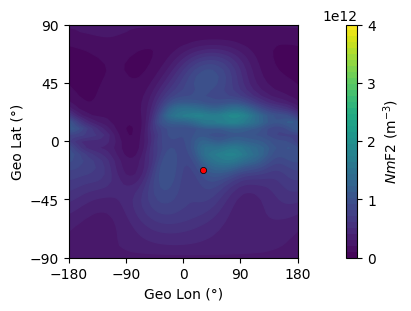

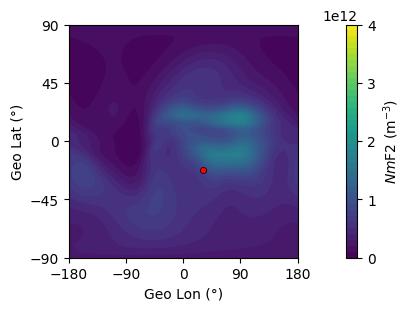

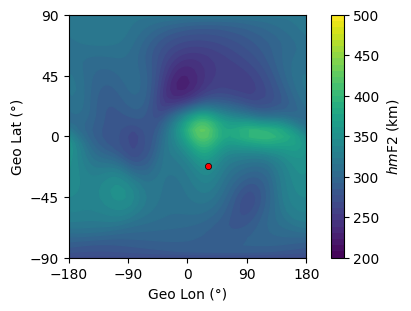

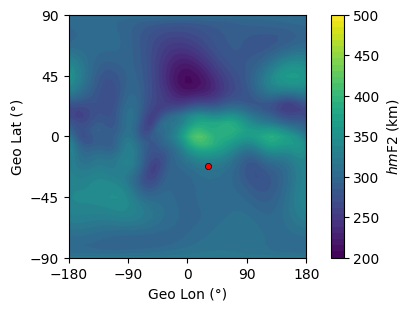

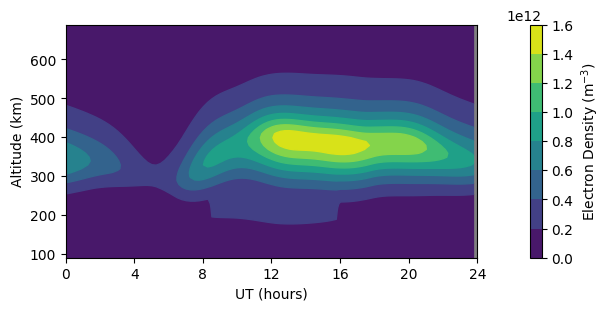

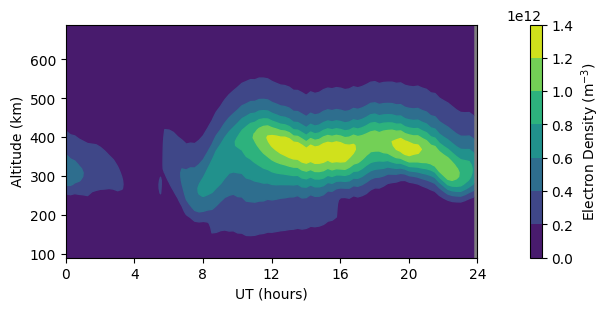

In [3]:
# Import libraries
import numpy as np
import PyIRI.main_library as ml
import PyIRI.plotting as plot
import PyIRTAM
print('Modules imported')

# Specify a directory on your machine where IRTAM coefficients live.
# In case you need to download them, follow Tutorial "PyIRTAM_with_download"
irtam_dir = '/Users/vmakarevich/Documents/Science_VF2/PyIRTAM/IRTAM/'

# Save plots at the following directory
# Directory must exist
# Please change this to your directory
save_plot_dir = '/Users/vmakarevich/Documents/GitHub/PyIRTAM-rc_v0.0.4/'

# Specify a year, a month, and a day
year = 2022
month = 1
day = 1

# Specify solar flux index F10.7 in SFU
f107 = 90.8

# Create any horizontal grid (regular or irregular, global or regional).
# The grid arrays (alon and alat) should be flattened to be 1-D arrays.
# This is an example of a regular global grid
dlon = 5
dlat = 5
# Create 5x5 horizontal grid:
alon, alat, alon_2d, alat_2d = ml.set_geo_grid(dlon, dlat)

# Create any temporal array expressed in decimal hours (regular or irregular).
# IRTAM coefficients have 15-min resolution. For max resolution use 15 min.
# For this example we use regularly spaced time array
hr_res = 0.25
ahr = np.arange(0, 24, hr_res)

# Create height array. It can be regular or irregular.
# Here is an example for regularly spaced array
alt_res = 10
alt_min = 90
alt_max = 700
aalt = np.arange(alt_min, alt_max, alt_res)

print('Running PyIRTAM')
# Run PyIRTAM
(f2_iri, f1_iri, e_iri, es_iri, sun, mag, edp_iri, f2_irtam, f1_irtam,
e_irtam, es_irtam, edp_irtam) = PyIRTAM.run_PyIRTAM(year, month, day, ahr,
                                                    alon, alat, aalt, f107,
                                                    irtam_dir=irtam_dir)
print('PyIRTAM run is completed')

UT_show = 10
print('Plot of PyIRI NmF2:')
plot.PyIRI_plot_NmF2(f2_iri, ahr, alon, alat, alon_2d, alat_2d, sun,
                     UT_show, save_plot_dir, plot_name='PyIRI_NmF2.pdf')
print('Plot of PyIRTAM NmF2:')
plot.PyIRI_plot_NmF2(f2_irtam, ahr, alon, alat, alon_2d, alat_2d, sun,
                     UT_show, save_plot_dir, plot_name='PyIRTAM_NmF2.pdf')

print('Plot of PyIRI hmF2:')
plot.PyIRI_plot_hmF2(f2_iri, ahr, alon, alat, alon_2d, alat_2d, sun,
                     UT_show, save_plot_dir, plot_name='PyIRI_hmF2.pdf')
print('Plot of PyIRTAM hmF2:')
plot.PyIRI_plot_hmF2(f2_irtam, ahr, alon, alat, alon_2d, alat_2d, sun,
                     UT_show, save_plot_dir, plot_name='PyIRTAM_hmF2.pdf')


# Plot density time series for PyIRI and PyIRTAM at specified location
lon_plot = 0
lat_plot = 0

print('Plot of PyIRI Density Slice:')
plot.PyIRI_plot_1location_diurnal_density(edp_iri, alon, alat, lon_plot,
                                          lat_plot, aalt, ahr, save_plot_dir,
                                          plot_name='PyIRI_EDP_diurnal.pdf')

print('Plot of PyIRTAM Density Slice:')
plot.PyIRI_plot_1location_diurnal_density(edp_irtam, alon, alat, lon_plot,
                                          lat_plot, aalt, ahr, save_plot_dir,
                                          plot_name='PyIRTAM_EDP_diurnal.pdf')